In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_volumes_sensors = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Volumenes/BASES VOLÚMENES CALIBRACIÓN.xlsx', sheet_name=1)

In [ ]:
!ls /content/drive/My\ Drive/Team\ 80\ DS4A/Secretaría\ de\ Movilidad\ -\ SGV/Data\ ejemplo/Volumenes

'BASES VOLÚMENES CALIBRACIÓN.xlsx'   Plots  'Presentacion Volúmenes_byRho.pptx'


In [ ]:
df_volumes = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Volumenes/BASES VOLÚMENES CALIBRACIÓN.xlsx', sheet_name=0)
df_volumes_sensors = pd.read_excel('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data ejemplo/Volumenes/BASES VOLÚMENES CALIBRACIÓN.xlsx', sheet_name=1)

In [ ]:
df_volumes_sensors

,Time (Beginning of Interval),Total Volume
0,05/04/2020 05:00,452
1,05/04/2020 05:15,539
2,05/04/2020 05:30,629
3,05/04/2020 05:45,670
4,05/04/2020 06:00,653
...,...,...
787,05/28/2020 21:45,169
788,05/28/2020 22:00,175
789,05/28/2020 22:15,182
790,05/28/2020 22:30,172


In [ ]:
periodos = df_volumes["PERIODO"].astype(str).unique()
periodos

array(['500', '515', '530', '545', '600', '615', '630', '645', '700',
       '715', '730', '745', '800', '815', '830', '845', '900', '915',
       '930', '945', '1000', '1015', '1030', '1045', '1100', '1115',
       '1130', '1145', '1200', '1215', '1230', '1245', '1300', '1315',
       '1330', '1345', '1400', '1415', '1430', '1445', '1500', '1515',
       '1530', '1545', '1600', '1615', '1630', '1645', '1700', '1715',
       '1730', '1745', '1800', '1815', '1830', '1845', '1900', '1915',
       '1930', '1945', '2000', '2015', '2030', '2045', '2100', '2115',
       '2130', '2145', '2200', '2215', '2230', '2245'], dtype=object)

'05:00'

In [ ]:
def fix_hours(hour):
  hour = hour.rjust(4,"0")
  hour = hour[0:2] + ":" + hour[2::]
  return hour

In [ ]:
df_volumes["PERIODO"].astype(str).apply(lambda x: fix_hours(x))

0      05:00
1      05:15
2      05:30
3      05:45
4      06:00
       ...  
787    21:45
788    22:00
789    22:15
790    22:30
791    22:45
Name: PERIODO, Length: 792, dtype: object

In [ ]:

print(periodos[0].rjust(4, "0"))

0500


In [ ]:
df_volumes["FECHA"].astype(str).unique()

array(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-11', '2020-05-13', '2020-05-15',
       '2020-05-19', '2020-05-20', '2020-05-28'], dtype=object)

In [ ]:
df_volumes.shape

(792, 11)

In [ ]:
topologies = ["LIVIANOS", "INTERMUNICIPALES", "BUSES", "MOTOS", "BICICLETAS CALZADA", "C2 C3", ">=C4"]

In [ ]:
df_volumes  

array(['AC17XKR135(SALIDACALLE13)', 'AC13XRIOBOGOTA',
       'AVCENTENARIO_KR138A'], dtype=object)

In [ ]:
df_volumes.isnull().sum()

FECHA                 0
DIRECCION CATASTRO    0
PERIODO               0
SENTIDO               0
LIVIANOS              0
INTERMUNICIPALES      0
BUSES                 0
C2 C3                 0
>=C4                  0
MOTOS                 0
BICICLETAS CALZADA    0
dtype: int64

In [ ]:
df_volumes.columns

Index(['FECHA', 'DIRECCION CATASTRO', 'PERIODO', 'SENTIDO', 'LIVIANOS',
       'INTERMUNICIPALES', 'BUSES', 'C2 C3', '>=C4', 'MOTOS',
       'BICICLETAS CALZADA'],
      dtype='object')

In [ ]:
df_volumes.head()

,FECHA,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
0,2020-05-04,AC17XKR135(SALIDACALLE13),500,EW,43,20,0,108,26,38,62
1,2020-05-04,AC17XKR135(SALIDACALLE13),515,EW,78,32,0,135,27,116,74
2,2020-05-04,AC17XKR135(SALIDACALLE13),530,EW,164,43,0,117,20,208,126
3,2020-05-04,AC17XKR135(SALIDACALLE13),545,EW,137,46,0,120,28,165,110
4,2020-05-04,AC17XKR135(SALIDACALLE13),600,EW,137,36,0,94,37,187,140


In [ ]:
df_volumes["SENTIDO"].unique()# east-west (ew)

array(['EW'], dtype=object)

In [ ]:
df_volumes["BUSES"].unique()

array([ 0, 11,  7,  8,  5,  4,  6,  2,  3, 10,  1,  9, 30, 26, 24, 40, 42,
       49, 51, 41, 31, 48, 32, 56, 44, 22, 66, 34, 13, 39, 33, 43, 23, 16,
       20, 28, 53, 35, 54, 19, 25, 27, 29, 36, 21, 15, 18, 37, 45, 17, 12,
       38, 50, 68, 46, 14])

In [ ]:
topologies

['LIVIANOS',
 'INTERMUNICIPALES',
 'BUSES',
 'MOTOS',
 'BICICLETAS CALZADA',
 'C2 C3',
 '>=C4']

In [ ]:
df_volumes[df_volumes["DIRECCION CATASTRO"] == "AVCENTENARIO_KR138A"]

,FECHA,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
576,2020-05-19,AVCENTENARIO_KR138A,500,EW,65,49,21,19,21,59,62
577,2020-05-19,AVCENTENARIO_KR138A,515,EW,105,51,20,23,23,168,99
578,2020-05-19,AVCENTENARIO_KR138A,530,EW,142,77,19,23,27,197,124
579,2020-05-19,AVCENTENARIO_KR138A,545,EW,178,85,34,28,20,175,117
580,2020-05-19,AVCENTENARIO_KR138A,600,EW,197,49,19,27,27,184,177
...,...,...,...,...,...,...,...,...,...,...,...
715,2020-05-20,AVCENTENARIO_KR138A,2145,EW,47,3,0,11,2,43,4
716,2020-05-20,AVCENTENARIO_KR138A,2200,EW,59,1,1,13,9,49,4
717,2020-05-20,AVCENTENARIO_KR138A,2215,EW,49,3,7,11,4,34,4
718,2020-05-20,AVCENTENARIO_KR138A,2230,EW,39,0,2,10,5,32,3


In [ ]:
df_volumes["DIRECCION CATASTRO"].unique()

array(['AC17XKR135(SALIDACALLE13)', 'AC13XRIOBOGOTA ',
       'AVCENTENARIO_KR138A'], dtype=object)

Núúmero de registros por dirección

In [ ]:
df_volumes.groupby("DIRECCION CATASTRO").count()

,FECHA,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
DIRECCION CATASTRO,,,,,,,,,,
AC13XRIOBOGOTA,72,72,72,72,72,72,72,72,72,72
AC17XKR135(SALIDACALLE13),576,576,576,576,576,576,576,576,576,576
AVCENTENARIO_KR138A,144,144,144,144,144,144,144,144,144,144


Analisis by each point where are the sensors: DIRECCION CATASTRO



In [ ]:
# c2 c3: entre 2 y 3 ejes (caminoes pequeños (estacas) y camiones medianos (camiones de postobon)) y >c4 (camiones grandes (volquetas, mulas, minimulas)) buses (microbuses, busetas, etc)
# hacer comparacióón entre puntos de la ciudad, y comparar con los datos de sensores que están en la otra hoja

In [ ]:
df_ac13 = df_volumes[df_volumes["DIRECCION CATASTRO"] == 'AC17XKR135(SALIDACALLE13)']

Restricciones: Pico y placa (particulares - horaria), ambiental (vehiculos de carga los máás grandes - horaria), restricción para vehículos de carga (horaria en calle 13), pico y placa (sitp provisional y taxis - diaria). 

In [ ]:
df_ac13.head(30)

,FECHA,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
0,2020-05-04,AC17XKR135(SALIDACALLE13),500,EW,43,20,0,108,26,38,62
1,2020-05-04,AC17XKR135(SALIDACALLE13),515,EW,78,32,0,135,27,116,74
2,2020-05-04,AC17XKR135(SALIDACALLE13),530,EW,164,43,0,117,20,208,126
3,2020-05-04,AC17XKR135(SALIDACALLE13),545,EW,137,46,0,120,28,165,110
4,2020-05-04,AC17XKR135(SALIDACALLE13),600,EW,137,36,0,94,37,187,140
5,2020-05-04,AC17XKR135(SALIDACALLE13),615,EW,149,46,0,67,35,245,136
6,2020-05-04,AC17XKR135(SALIDACALLE13),630,EW,206,36,0,65,35,274,153
7,2020-05-04,AC17XKR135(SALIDACALLE13),645,EW,172,41,0,71,25,216,97
8,2020-05-04,AC17XKR135(SALIDACALLE13),700,EW,140,30,0,73,12,170,71
9,2020-05-04,AC17XKR135(SALIDACALLE13),715,EW,151,24,0,80,20,177,72


In [ ]:
topologies

['LIVIANOS',
 'INTERMUNICIPALES',
 'BUSES',
 'MOTOS',
 'BICICLETAS CALZADA',
 'C2 C3',
 '>=C4']

In [ ]:
df_ac13_clean = df_ac13[df_ac13["PERIODO"].isin([i for i in df_ac13["PERIODO"].unique() if "00" in str(i)])]

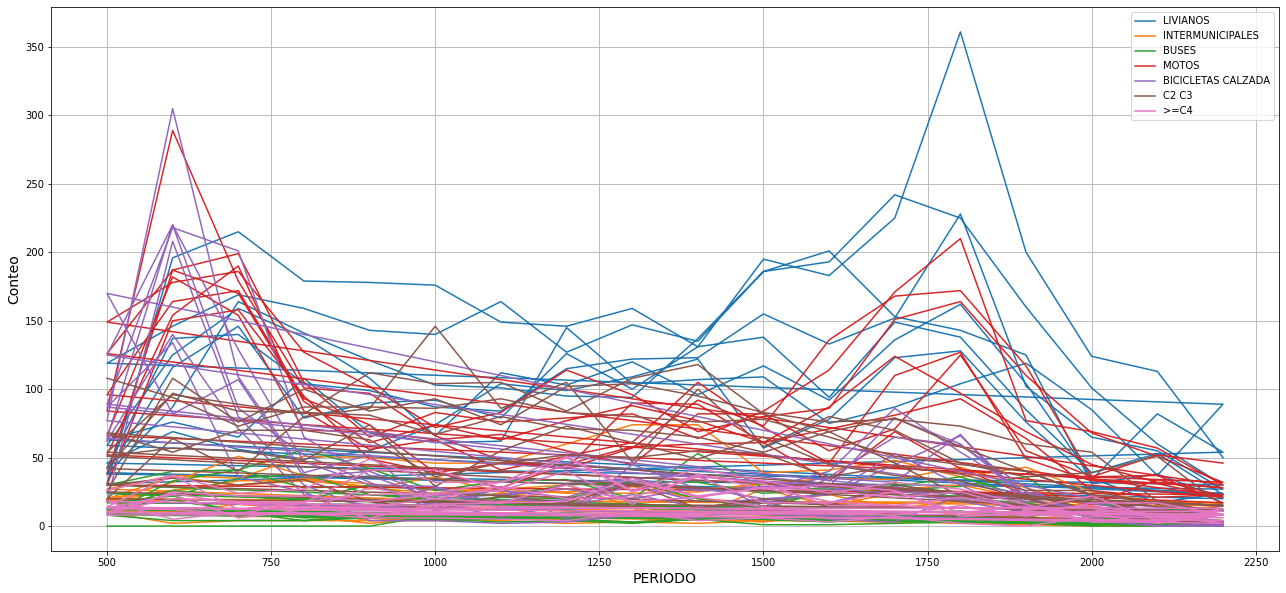

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))
all_plots = []
for i in topologies:
  all_plots.append(ax.plot(df_ac13_clean["PERIODO"], df_ac13_clean[i])[0])

ax.set_xlabel("PERIODO", fontsize=14)
ax.set_ylabel("Conteo", fontsize=14)
ax.legend(tuple(all_plots), tuple(topologies))
ax.grid(True)

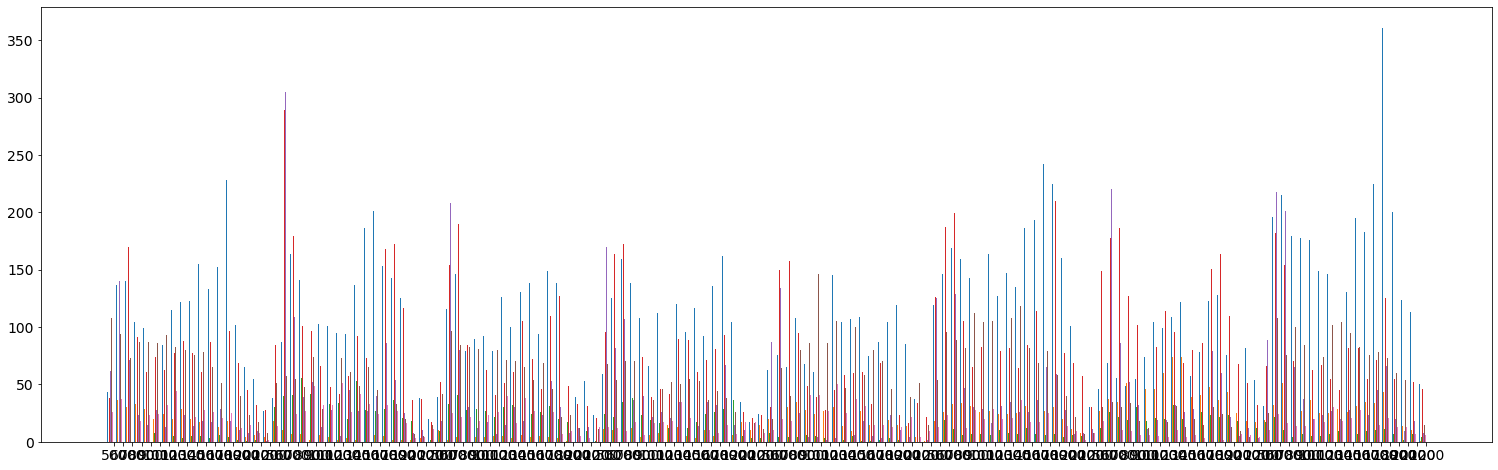

In [ ]:
width = 0.10         # the width of the bars
N = df_ac13_clean.shape[0]
total_vehicles_per_hour = df_ac13_clean[topologies].sum(axis=1)
ind = np.arange(N)    # the x locations for the groups
offset = 0
fig, ax = plt.subplots(figsize=(26,8))
all_plots_bar = []
for i in topologies:
  all_plots_bar.append(ax.bar(ind, df_ac13_clean[i], width)[0])
  ind = ind + width

ax.set_xticks(ind + width / 2);
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
ax.set_xticklabels([str(i) for i in df_ac13_clean["PERIODO"]]);

In [ ]:
all_registered_dates_monitoring = df_volumes["FECHA"].astype(str).unique()

In [ ]:
df_volumes_fixed = df_volumes[df_volumes["PERIODO"].isin([i for i in df_volumes["PERIODO"].unique() if "00" in str(i)])]

In [ ]:
def proportion_by_tipology_plot(df_volumes, d):
  df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
  width = 0.25        # the width of the bars
  N = df_filt.shape[0]
  total_vehicles_per_hour = df_filt[topologies].sum(axis=1)
  ind = np.arange(N)    # the x locations for the groups
  offset = 0
  bottom = 0
  fig, ax = plt.subplots(figsize=(26,8))
  all_plots_bar = []
  for i in topologies:
    count_by_topology = df_filt[i]/total_vehicles_per_hour
    all_plots_bar.append(ax.bar(ind, count_by_topology, width, bottom=bottom)[0])
    bottom = bottom + count_by_topology
    # ind = ind + width

  ax.set_title(d, fontsize=16)
  ax.set_xticks(ind + width / 2);
  plt.xticks(rotation=45, fontsize=14);
  plt.yticks(fontsize=14);
  ax.legend(tuple(all_plots_bar), tuple(topologies));
  ax.set_xticklabels([str(i) for i in df_filt["PERIODO"]]);
  plt.savefig("proportion by tipology {}".format(d), dpi=100)

In [ ]:
topologies

['LIVIANOS',
 'INTERMUNICIPALES',
 'BUSES',
 'MOTOS',
 'BICICLETAS CALZADA',
 'C2 C3',
 '>=C4']

In [ ]:
import os
os.getcwd()
[f for f in os.listdir('.') if os.path.isfile(f)]

['proportion by tipology 2020-05-04.png',
 'proportion by tipology 2020-05-15.png',
 'proportion by tipology 2020-05-06.png',
 'proportion by tipology 2020-05-13.png',
 'proportion by tipology 2020-05-05.png',
 'proportion by tipology 2020-05-11.png',
 'proportion by tipology 2020-05-19.png',
 'proportion by tipology 2020-05-28.png',
 'proportion by tipology 2020-05-08.png',
 'proportion by tipology 2020-05-07.png',
 'proportion by tipology 2020-05-20.png']

In [ ]:
def staked_by_topology_plot(df_volumes, d):
  df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
  total_vehicles_per_hour = df_filt[topologies].sum(axis=1)

  fig, ax = plt.subplots(figsize=(26,8))
  x = df_filt["PERIODO"]
  y = []
  for i in topologies:
    y.append(df_filt[i]/total_vehicles_per_hour)
    
  ax.stackplot(x, y, colors=['blue','green','red','cyan', 'magenta', 'yellow', 'black'])


In [ ]:
def staked_by_topology_plotly(df_volumes, d):
  df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
  total_vehicles_per_hour = df_filt[topologies].sum(axis=1)
  data = []
  for i in topologies:
    data.append( go.Bar(name=i, x=df_filt["PERIODO"], y=(df_filt[i]/total_vehicles_per_hour)) )

  fig = go.Figure(data=data)
  fig.update_layout(barmode='stack')
  return fig

In [ ]:
df_volumes["FECHA"].astype(str) == all_registered_dates_monitoring[0]

0       True
1       True
2       True
3       True
4       True
       ...  
787    False
788    False
789    False
790    False
791    False
Name: FECHA, Length: 792, dtype: bool

In [ ]:
staked_by_topology_plotly(df_volumes_fixed, all_registered_dates_monitoring[0])

In [ ]:
import plotly.express as px
fig = px.area(, x="year", y="pop", color="continent", line_group="country")

In [ ]:

data = [go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]) for ]

In [ ]:
fig = go.Figure(data=data)

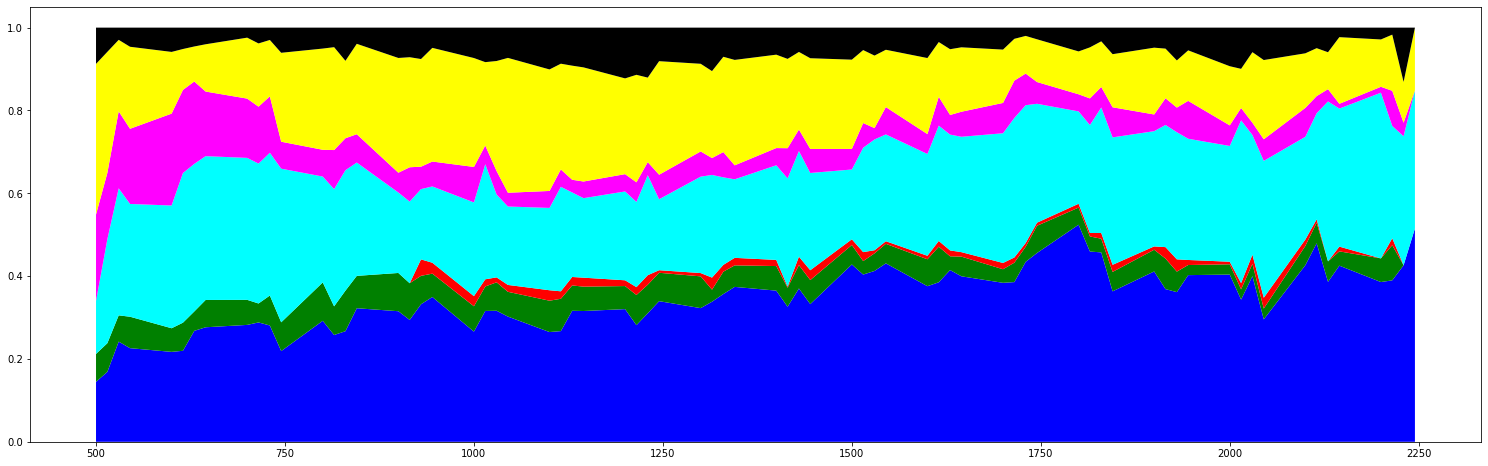

In [ ]:
staked_by_topology_plot(df_volumes, all_registered_dates_monitoring[0])

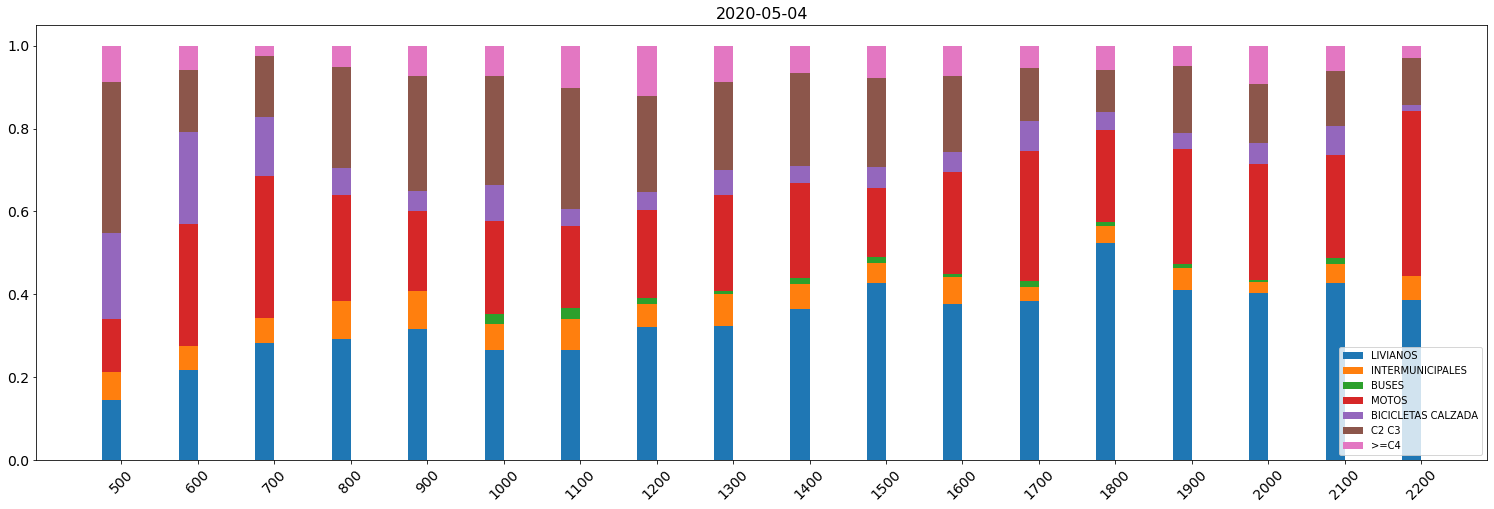

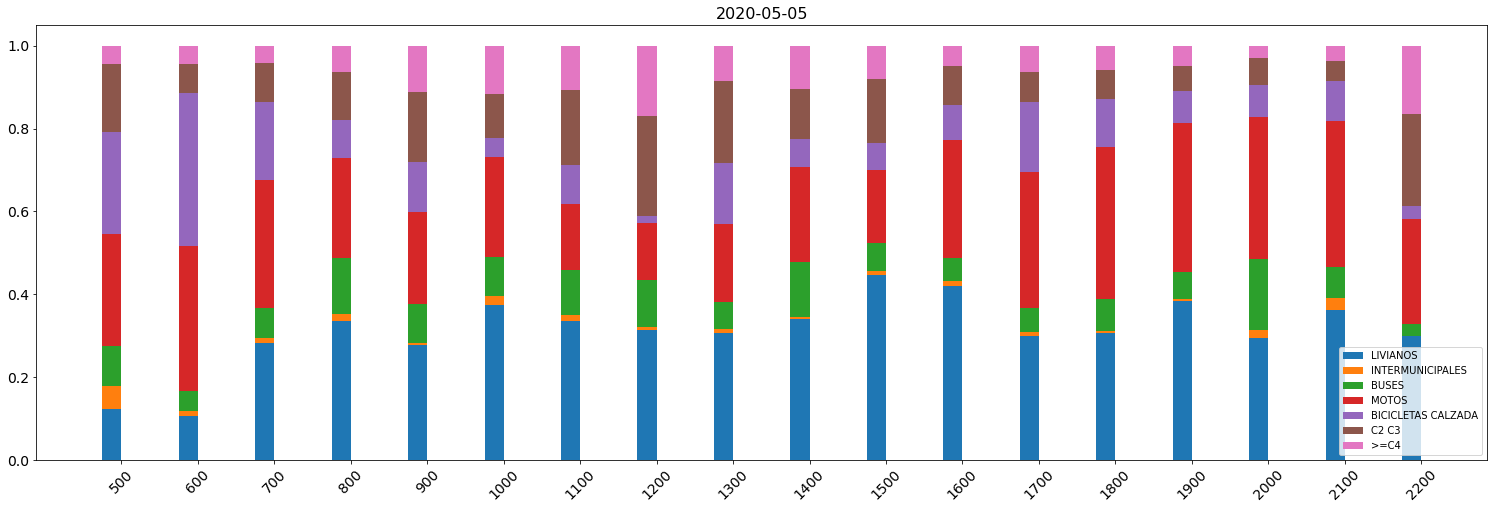

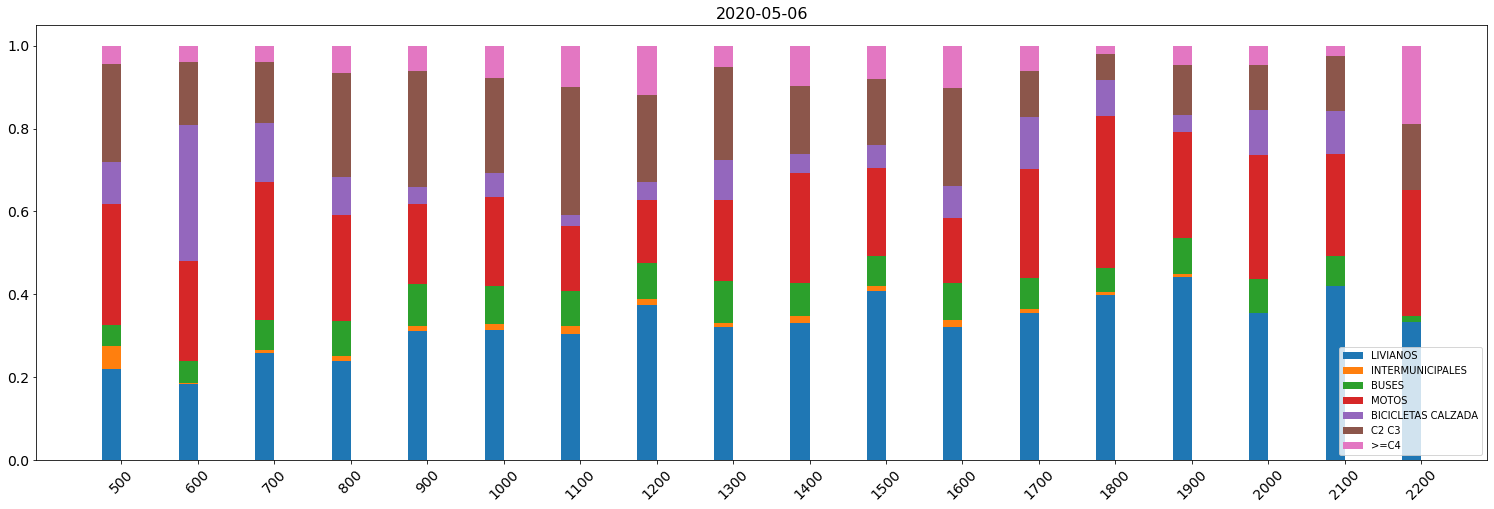

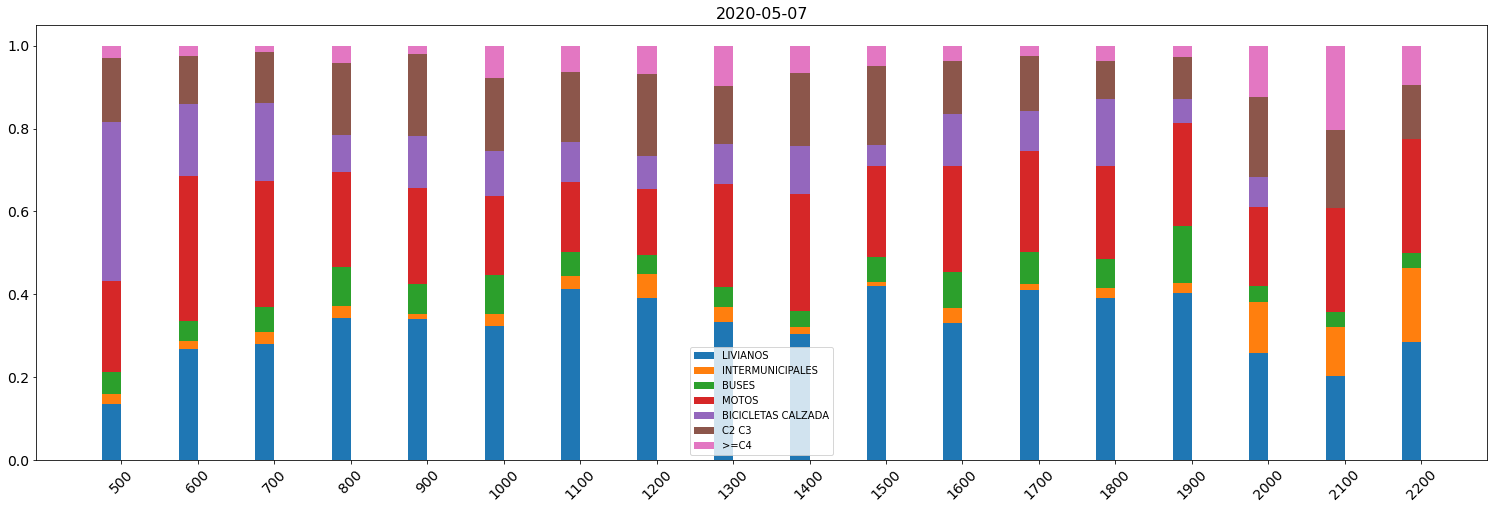

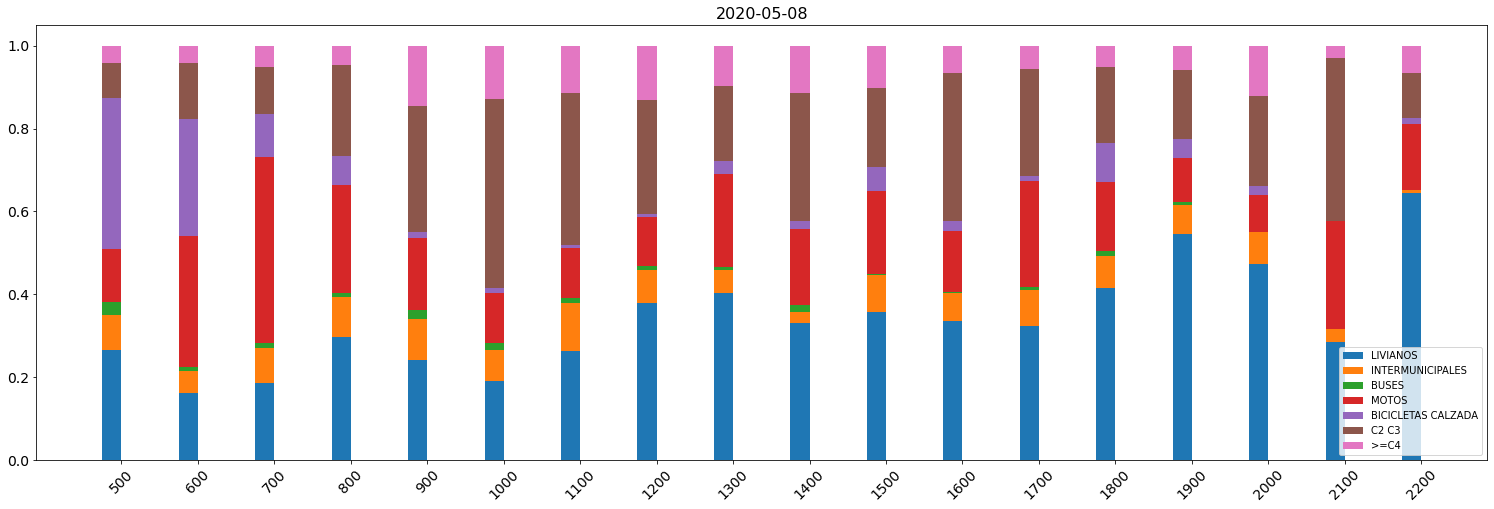

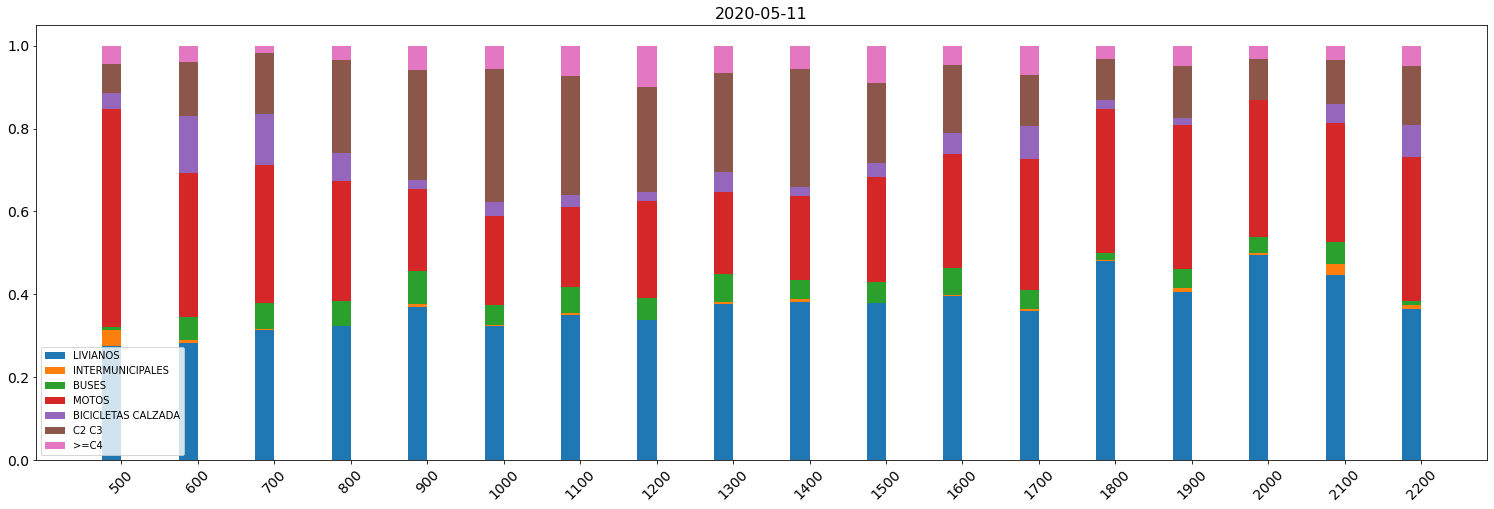

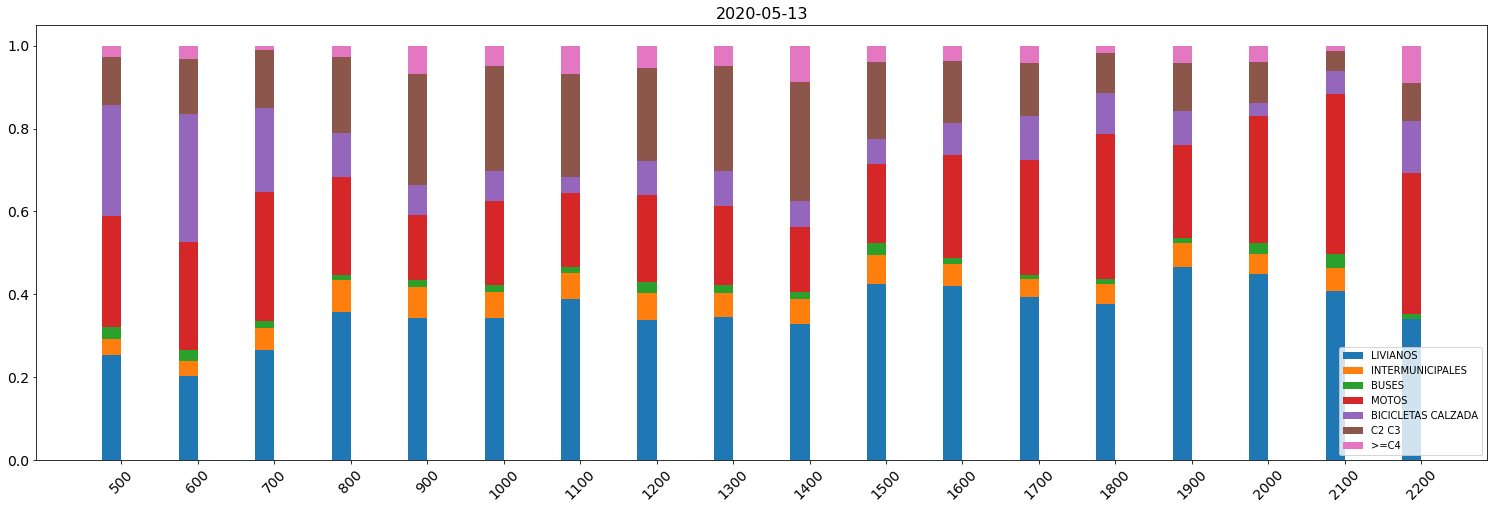

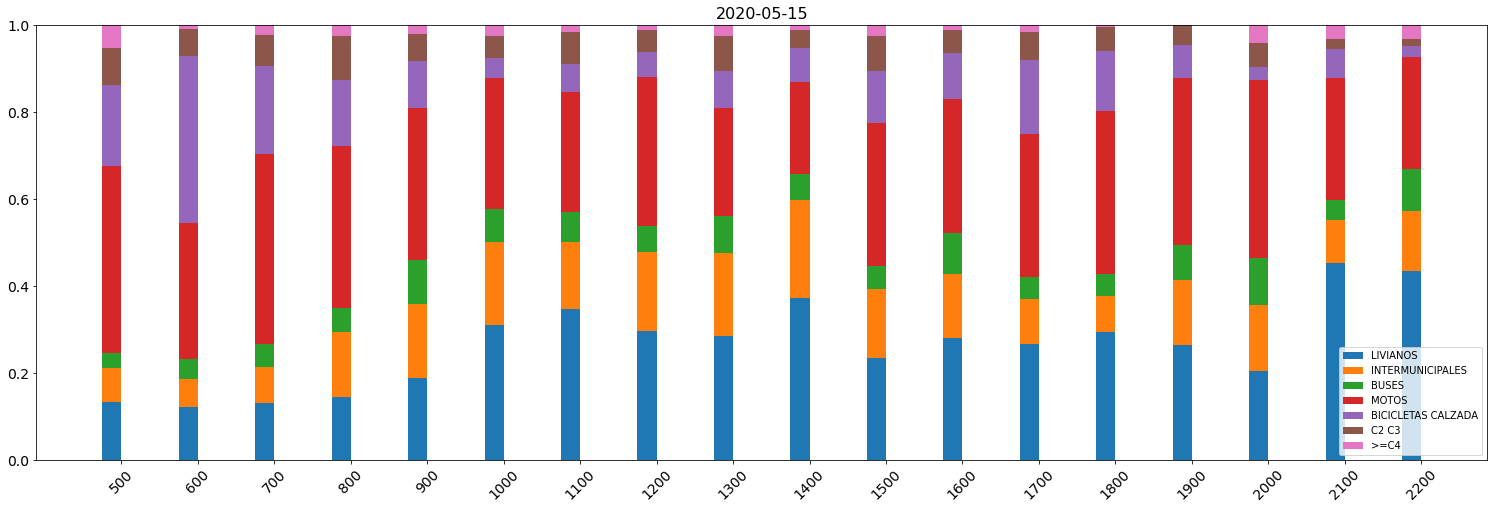

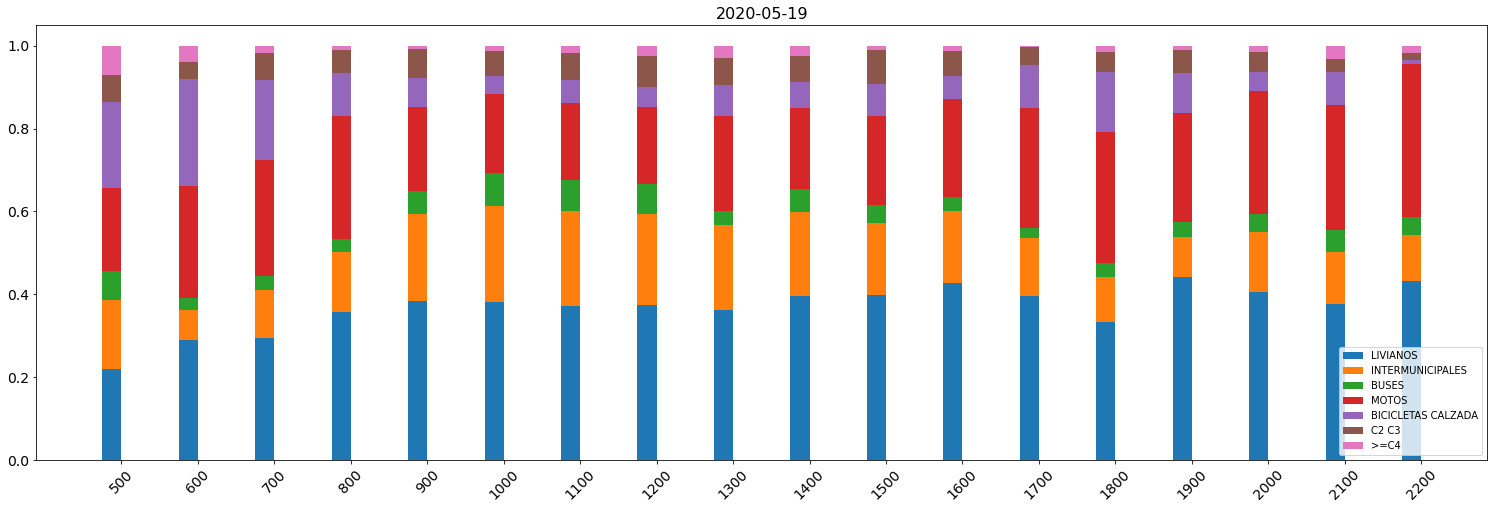

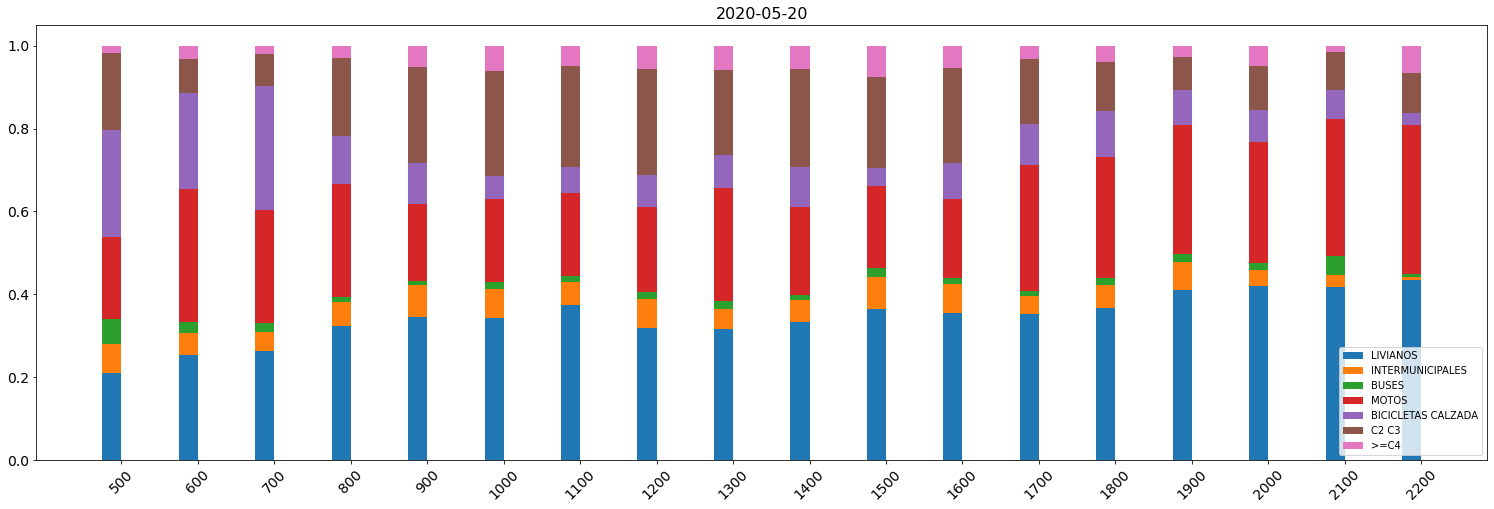

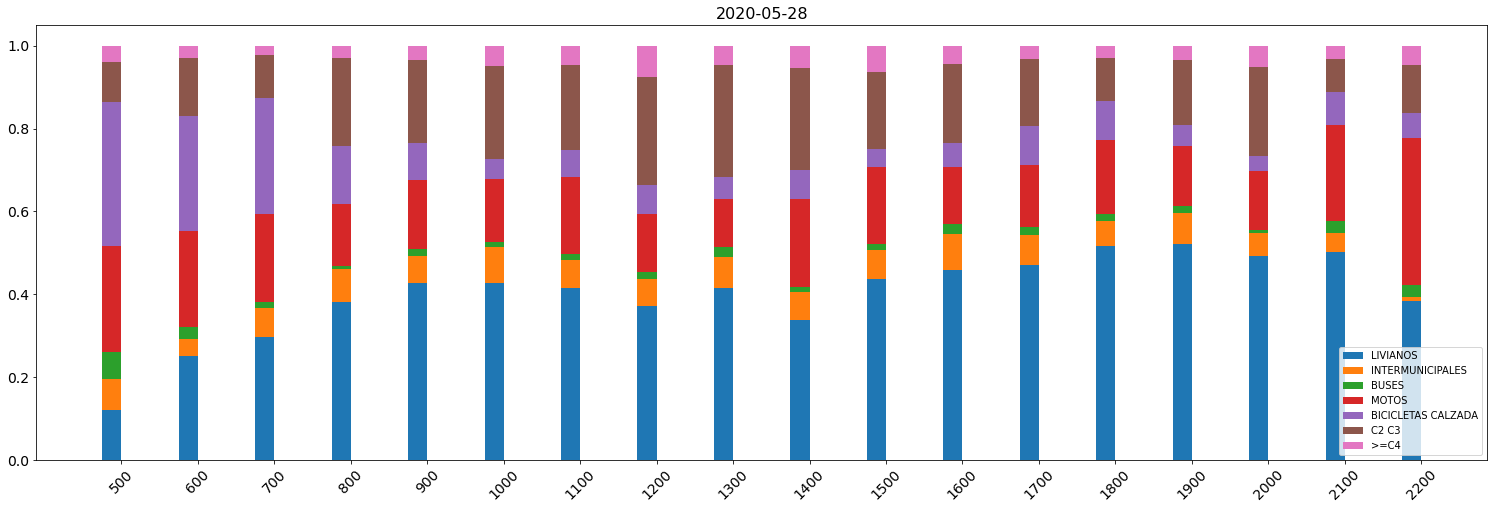

In [ ]:
# d = all_registered_dates_monitoring[0]
for d in all_registered_dates_monitoring:
  proportion_by_tipology_plot(df_volumes_fixed, d)

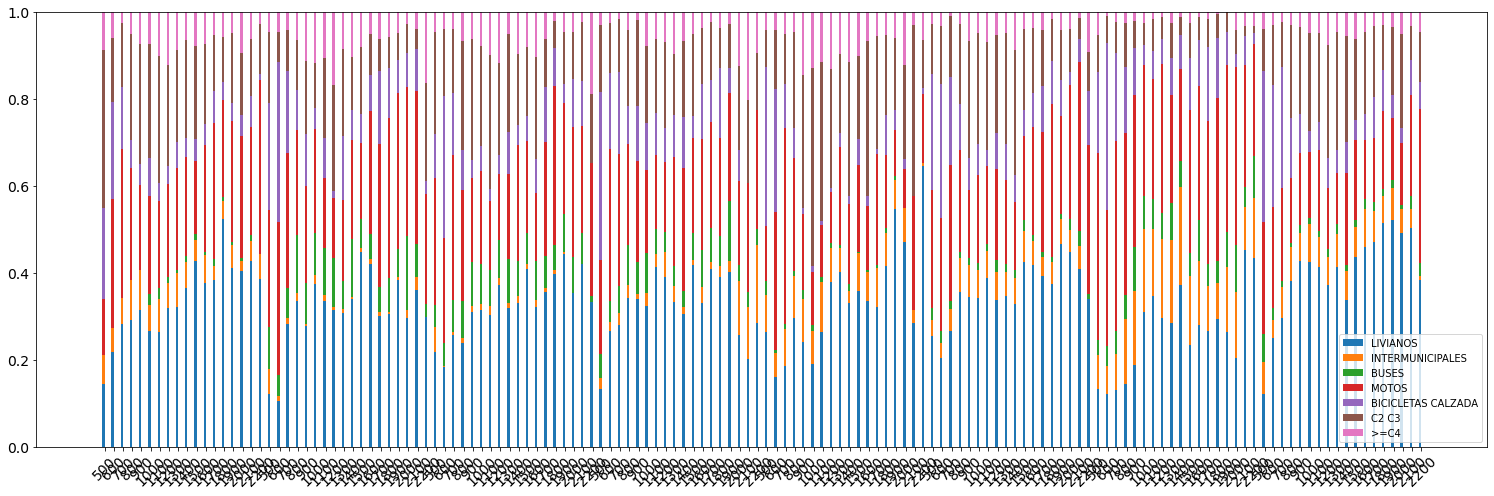

In [ ]:
width = 0.25        # the width of the bars
N = df_ac13_clean.shape[0]
total_vehicles_per_hour = df_ac13_clean[topologies].sum(axis=1)
ind = np.arange(N)    # the x locations for the groups
offset = 0
bottom = 0
fig, ax = plt.subplots(figsize=(26,8))
all_plots_bar = []
for i in topologies:
  count_by_topology = df_ac13_clean[i]/total_vehicles_per_hour
  all_plots_bar.append(ax.bar(ind, count_by_topology, width, bottom=bottom)[0])
  bottom = bottom + count_by_topology
  # ind = ind + width

ax.set_xticks(ind + width / 2);
plt.xticks(rotation=45, fontsize=14);
plt.yticks(fontsize=14);
ax.legend(tuple(all_plots_bar), tuple(topologies));
ax.set_xticklabels([str(i) for i in df_ac13_clean["PERIODO"]]);

In [ ]:
df_volumes[df_volumes["DIRECCION CATASTRO"] == 'AC17XKR135(SALIDACALLE13)']

,FECHA,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
0,2020-05-04,AC17XKR135(SALIDACALLE13),500,EW,43,20,0,108,26,38,62
1,2020-05-04,AC17XKR135(SALIDACALLE13),515,EW,78,32,0,135,27,116,74
2,2020-05-04,AC17XKR135(SALIDACALLE13),530,EW,164,43,0,117,20,208,126
3,2020-05-04,AC17XKR135(SALIDACALLE13),545,EW,137,46,0,120,28,165,110
4,2020-05-04,AC17XKR135(SALIDACALLE13),600,EW,137,36,0,94,37,187,140
...,...,...,...,...,...,...,...,...,...,...,...
787,2020-05-28,AC17XKR135(SALIDACALLE13),2145,EW,46,4,1,13,7,52,6
788,2020-05-28,AC17XKR135(SALIDACALLE13),2200,EW,50,1,4,15,6,46,8
789,2020-05-28,AC17XKR135(SALIDACALLE13),2215,EW,39,1,5,12,8,42,1
790,2020-05-28,AC17XKR135(SALIDACALLE13),2230,EW,35,1,2,11,6,21,6


In [ ]:
df_volumes_indexed = df_volumes.set_index('FECHA')

In [ ]:
df_volumes_indexed['2020-05-04':'2020-05-04']

,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
FECHA,,,,,,,,,,
2020-05-04,AC17XKR135(SALIDACALLE13),500,EW,43,20,0,108,26,38,62
2020-05-04,AC17XKR135(SALIDACALLE13),515,EW,78,32,0,135,27,116,74
2020-05-04,AC17XKR135(SALIDACALLE13),530,EW,164,43,0,117,20,208,126
2020-05-04,AC17XKR135(SALIDACALLE13),545,EW,137,46,0,120,28,165,110
2020-05-04,AC17XKR135(SALIDACALLE13),600,EW,137,36,0,94,37,187,140
...,...,...,...,...,...,...,...,...,...,...
2020-05-04,AC17XKR135(SALIDACALLE13),2145,EW,37,3,1,14,2,29,1
2020-05-04,AC17XKR135(SALIDACALLE13),2200,EW,27,4,0,8,2,28,1
2020-05-04,AC17XKR135(SALIDACALLE13),2215,EW,23,5,1,8,1,16,5


In [ ]:
df_volumes["FECHA"].unique()

array(['2020-05-04T00:00:00.000000000', '2020-05-05T00:00:00.000000000',
       '2020-05-06T00:00:00.000000000', '2020-05-07T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-13T00:00:00.000000000', '2020-05-15T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-20T00:00:00.000000000',
       '2020-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df_volumes.groupby(["FECHA", "DIRECCION CATASTRO"]).count()

,,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA
FECHA,DIRECCION CATASTRO,,,,,,,,,
2020-05-04,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-05,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-06,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-07,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-08,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-11,AC13XRIOBOGOTA,72,72,72,72,72,72,72,72,72
2020-05-13,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-15,AC17XKR135(SALIDACALLE13),72,72,72,72,72,72,72,72,72
2020-05-19,AVCENTENARIO_KR138A,72,72,72,72,72,72,72,72,72


In [ ]:
df_volumes_sensors["FECHA"] = df_volumes_sensors["Time (Beginning of Interval)"].dt.date

AttributeError: ignored

In [ ]:
df_volumes["TOTAL VOLUME"] = df_volumes[topologies].sum(axis=1)

In [ ]:
df_riobogota = df_volumes[df_volumes["DIRECCION CATASTRO"] == "AC13XRIOBOGOTA "]

In [ ]:
df_riobogota.head()

,FECHA,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA,TOTAL VOLUME
360,2020-05-11,AC13XRIOBOGOTA,500,EW,82,12,2,21,13,157,12,299
361,2020-05-11,AC13XRIOBOGOTA,515,EW,87,16,16,39,19,165,39,381
362,2020-05-11,AC13XRIOBOGOTA,530,EW,128,9,31,66,25,219,38,516
363,2020-05-11,AC13XRIOBOGOTA,545,EW,166,8,30,84,25,175,99,587
364,2020-05-11,AC13XRIOBOGOTA,600,EW,166,4,33,77,23,205,81,589


In [ ]:
def get_hour_clean(x):
  hour = str(x)[10:16]
  hour_clean = str(int(re.sub(":", "", hour)))
  return hour_clean

In [ ]:
df_volumes_sensors["PERIOD"] = df_volumes_sensors["Time (Beginning of Interval)"].apply(lambda x: get_hour_clean(x))

In [ ]:
df_volumes_sensors

,Time (Beginning of Interval),Total Volume,PERIOD
0,05/04/2020 05:00,452,500
1,05/04/2020 05:15,539,515
2,05/04/2020 05:30,629,530
3,05/04/2020 05:45,670,545
4,05/04/2020 06:00,653,600
...,...,...,...
787,05/28/2020 21:45,169,2145
788,05/28/2020 22:00,175,2200
789,05/28/2020 22:15,182,2215
790,05/28/2020 22:30,172,2230


In [ ]:
df_riobogota_clean = df_riobogota[df_riobogota["PERIODO"].isin([i for i in df_riobogota["PERIODO"].unique() if "00" in str(i)])]
df_riobogota_clean.head()

,FECHA,DIRECCION CATASTRO,PERIODO,SENTIDO,LIVIANOS,INTERMUNICIPALES,BUSES,C2 C3,>=C4,MOTOS,BICICLETAS CALZADA,TOTAL VOLUME
360,2020-05-11,AC13XRIOBOGOTA,500,EW,82,12,2,21,13,157,12,299
364,2020-05-11,AC13XRIOBOGOTA,600,EW,166,4,33,77,23,205,81,589
368,2020-05-11,AC13XRIOBOGOTA,700,EW,158,1,32,74,9,169,62,505
372,2020-05-11,AC13XRIOBOGOTA,800,EW,142,0,26,98,15,127,30,438
376,2020-05-11,AC13XRIOBOGOTA,900,EW,138,3,30,100,22,74,8,375


In [ ]:
df_volumes_sensors_clean = df_volumes_sensors[df_volumes_sensors["FECHA"].astype(str) == "2020-05-11"]
df_volumes_sensors_clean = df_volumes_sensors_clean[df_volumes_sensors_clean["PERIOD"].isin([i for i in df_volumes_sensors_clean["PERIOD"].unique() if "00" in str(i)])]
df_volumes_sensors_clean.head()

,Time (Beginning of Interval),Total Volume,FECHA,PERIOD
360,2020-05-11 05:00:00,476,2020-05-11,500
364,2020-05-11 06:00:00,757,2020-05-11,600
368,2020-05-11 07:00:00,698,2020-05-11,700
372,2020-05-11 08:00:00,723,2020-05-11,800
376,2020-05-11 09:00:00,648,2020-05-11,900


In [ ]:
df_volumes_sensors_clean["PERIOD"] = df_volumes_sensors_clean["PERIOD"].astype(int)

In [ ]:
df_riobogota_clean["PERIODO"] = df_riobogota_clean["PERIODO"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


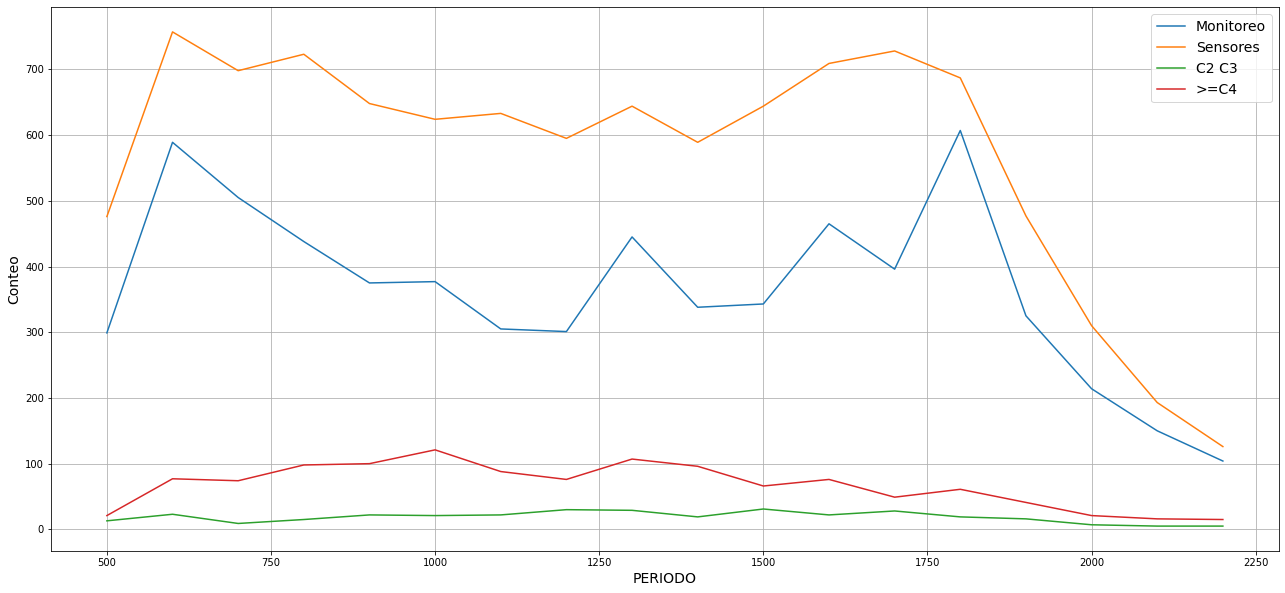

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))

p1 = ax.plot(df_riobogota_clean["PERIODO"], df_riobogota_clean["TOTAL VOLUME"])
p2 = ax.plot(df_volumes_sensors_clean["PERIOD"], df_volumes_sensors_clean["Total Volume"])
p3 = ax.plot(df_riobogota_clean["PERIODO"],  df_riobogota_clean[">=C4"])
p4 = ax.plot(df_riobogota_clean["PERIODO"],  df_riobogota_clean["C2 C3"])


ax.set_xlabel("PERIODO", fontsize=14)
ax.set_ylabel("Conteo", fontsize=14)
ax.legend((p1[0], p2[0], p3[0], p4[0]), ("Monitoreo", "Sensores", "C2 C3", ">=C4"), fontsize=14)
ax.grid(True)
plt.savefig("comparison monitoring and floor sensors", dpi=100)

# Posiblemente el sobreconteo sea generado por el conteo de vehiculos de carga (c3 c4) que pasan sobre el sensor.
# Se puede observar este fenomeno, al visualizar ambas series para las tipologias C2, C3 y C4
# Esto nos lleva a pensar que quizas las fuentes no son comparables a nivel de magnitud, pero si en tendencia
# de manera agregada

In [ ]:
locations_for_monitoring = df_volumes["DIRECCION CATASTRO"].unique()

In [ ]:
df_volumes_sensors[df_volumes_sensors["FECHA"].astype(str) == "2020-05-11"]

In [ ]:
df_volumes["FECHA"].unique()

array(['2020-05-04T00:00:00.000000000', '2020-05-05T00:00:00.000000000',
       '2020-05-06T00:00:00.000000000', '2020-05-07T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-13T00:00:00.000000000', '2020-05-15T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-20T00:00:00.000000000',
       '2020-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

Comparison by dates for monitoring registers

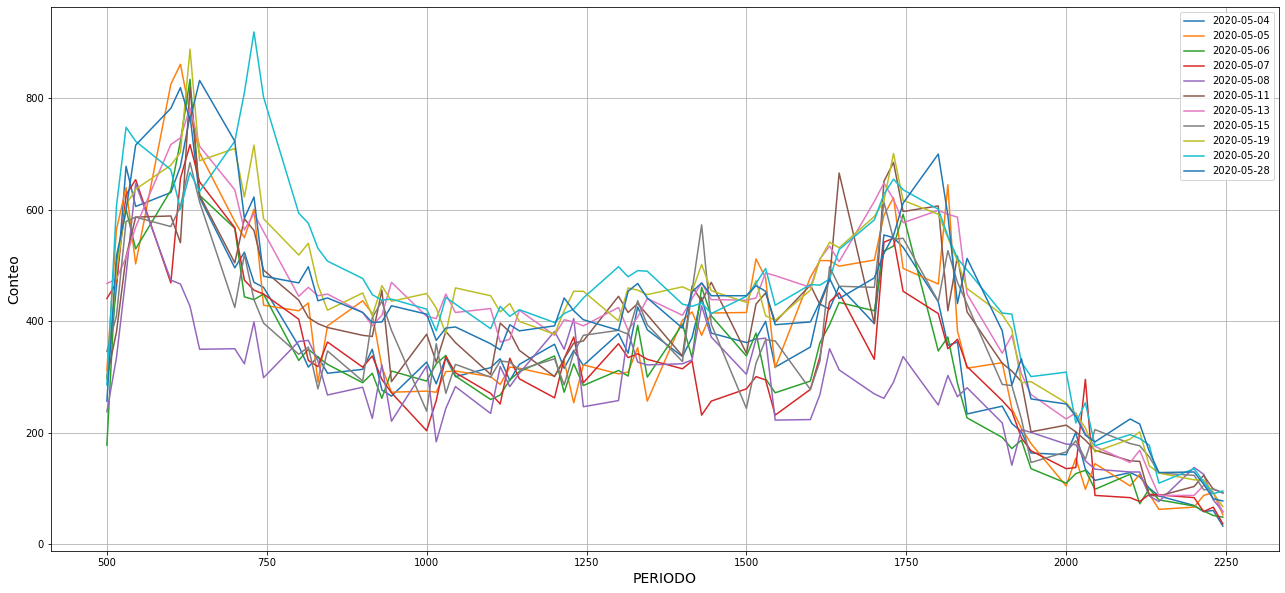

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))

all_registered_dates_monitoring = df_volumes["FECHA"].astype(str).unique()
# for each date
all_plots = []
for d in all_registered_dates_monitoring:
  df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
  all_plots.append(ax.plot(df_filt["PERIODO"], df_filt["TOTAL VOLUME"])[0])

ax.set_xlabel("PERIODO", fontsize=14)
ax.set_ylabel("Conteo", fontsize=14)
ax.legend(tuple(all_plots), tuple(all_registered_dates_monitoring))
ax.grid(True)

In [ ]:
import plotly.graph_objects as go

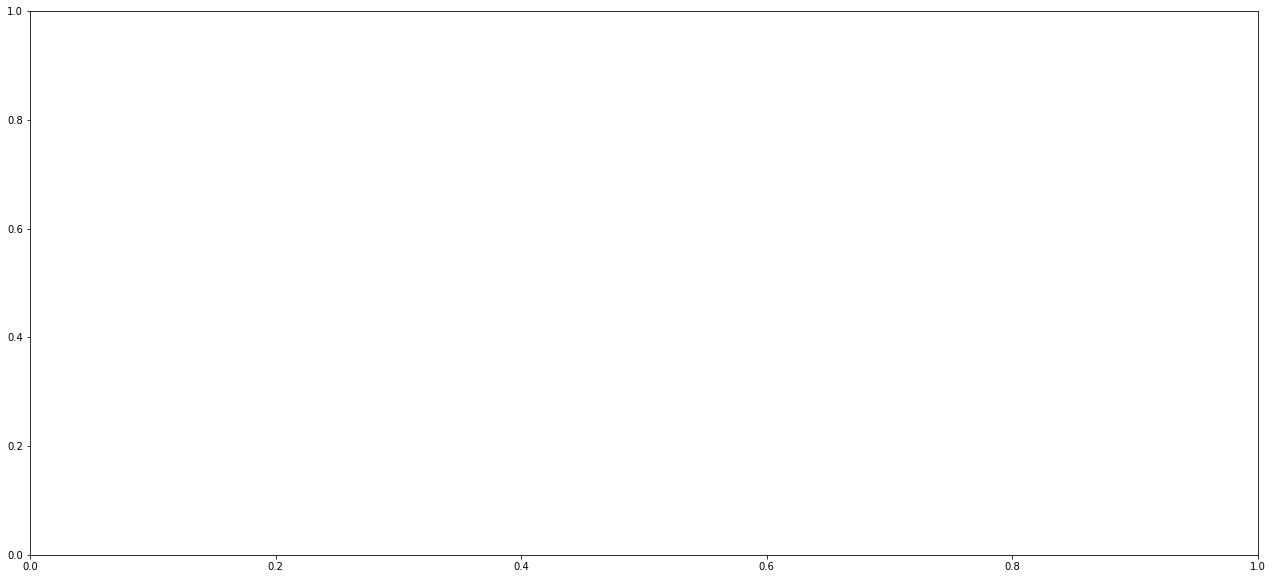

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))

all_registered_dates_monitoring = df_volumes["FECHA"].astype(str).unique()
# for each date
all_plots = []
for d in all_registered_dates_monitoring:
  df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
  # all_plots.append(ax.plot(df_filt["PERIODO"], df_filt["TOTAL VOLUME"])[0])
  all_plots.append(go.Scatter(x=df_filt["PERIODO"], y=df_filt["TOTAL VOLUME"], mode="lines"))

# all_plots[0]
# ax.set_xlabel("PERIODO", fontsize=14)
# ax.set_ylabel("Conteo", fontsize=14)
# ax.legend(tuple(all_plots), tuple(all_registered_dates_monitoring))
# ax.grid(True)

In [ ]:
fig = go.Figure(
    data=all_plots
)
fig.show()

In [ ]:
def multiLine(df, tipology):
  all_registered_dates_monitoring = df["FECHA"].astype(str).unique()
  # for each date
  all_plots = []
  for d in all_registered_dates_monitoring:
    df_filt = df[df["FECHA"].astype(str) == d]
    # all_plots.append(ax.plot(df_filt["PERIODO"], df_filt["TOTAL VOLUME"])[0])
    all_plots.append(go.Scatter(x=df_filt["PERIODO"], y=df_filt[tipology], mode="lines", name=d))

  fig = go.Figure(
    data=all_plots,
    layout= go.Layout(title="Volumen por tipología {}".format(tipology), xaxis={"title": "Período"})
  )
  return fig

In [ ]:
multiLine(df_volumes, "LIVIANOS")

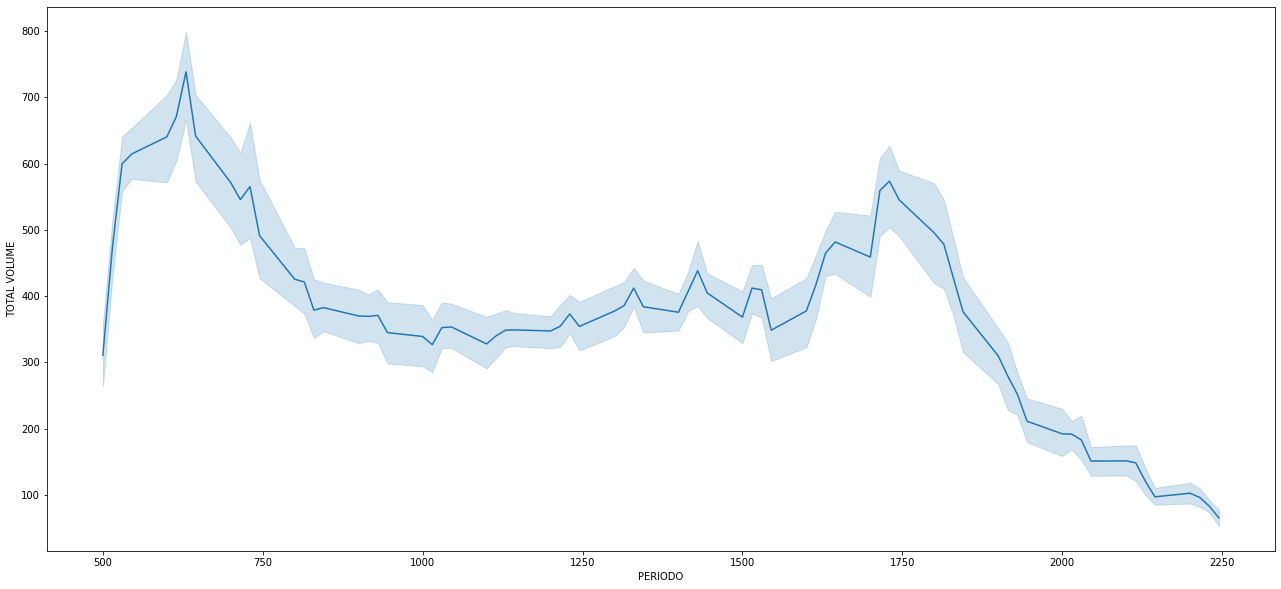

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))
sns.lineplot(data=df_volumes, x="PERIODO", y="TOTAL VOLUME")

In [ ]:
def line_plot_by_tipology_sns(df_volumes, tipology):
  figure, ax = plt.subplots(1, 1, figsize=(22,10))
  sns.lineplot(data=df_volumes, x="PERIODO", y=tipology)
  ax.set_title(tipology, fontsize=16)
  ax.set_xlabel("PERIODO", fontsize=14)
  ax.set_ylabel("Conteo", fontsize=14)
  plt.savefig("line plot with confidence interval {}".format(tipology), dpi=100)
  ax.grid(True)

In [ ]:
def line_plot_by_tipology(df_volumes, tipology):
  figure, ax = plt.subplots(1, 1, figsize=(22,10))

  all_registered_dates_monitoring = df_volumes["FECHA"].astype(str).unique()
  # for each date
  all_plots = []
  for d in all_registered_dates_monitoring:
    df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
    all_plots.append(ax.plot(df_filt["PERIODO"], df_filt[tipology])[0])

  ax.set_title(tipology, fontsize=16)
  ax.set_xlabel("PERIODO", fontsize=14)
  ax.set_ylabel("Conteo", fontsize=14)
  ax.legend(tuple(all_plots), tuple(all_registered_dates_monitoring))
  ax.grid(True)


In [ ]:
topologies

['LIVIANOS',
 'INTERMUNICIPALES',
 'BUSES',
 'MOTOS',
 'BICICLETAS CALZADA',
 'C2 C3',
 '>=C4']

In [ ]:
for t in topologies:
  line_plot_by_tipology(df_volumes, t)
  line_plot_by_tipology_sns(df_volumes, t)

# Municipales: La alta variabilidad de los conteos puede estar relacionada con factores externos dados los eventos (pandemia). Ver más a fondo.
# Buses: Registro en ceros (lluvia o accidente). Outliers rojo (enbotellamiento por accidente, dado que no existen alternativas de desvio para buses).
# Motos: 
# >=C4: Outlier debido a un mal registro de parte de la persona que registro.
# C2 C3: Quizas la coyuntura pudo afectar el consumo de alimentos o la producción debido a la falta de asistencia a centro de empleos
# (a pesar de que no habían restricciones - dado que este tipo de tipologia no deberia)
# Bicletas: Por la mañana puede ser altamente usado en este sentido por personas que trabajan en personas en las afueras o municipios aledaños a
# bogotá Madrid, mosquera, etc.
#

Output hidden; open in https://colab.research.google.com to view.

**Mas archivos: Mobility**

In [ ]:
!ls /content/drive/My\ Drive/Team\ 80\ DS4A/Secretaría\ de\ Movilidad\ -\ SGV/Data_Final/Volumenes/

 ContVehiMobility_cl13.csv     ContVehiMobilty_cl13.xlsx
 ContVehiMobilty_cl13.gsheet  'Copy of ContVehiMobilty_cl13.gsheet'


In [ ]:
df_volumes_no_agg = pd.read_csv("/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Volumenes/ContVehiMobility_cl13.csv", sep=";")

In [ ]:
df_volumes_no_agg.head()

,objectid,time,fecha,ano,mes,dia_semana,hora,site_id,direction,direccion,lane,speed,flow,occupancy,length,intensity,congested,inverted,name,orientacion,the_geom
0,1,2020-05-04 05:00:01.898508,2020-05-04 00:00:01.898508,2020,May,Lunes,0,25004,3,Oriente,2,0.0,60,0,0.0,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
1,2,2020-05-04 05:02:01.982643,2020-05-04 00:02:01.982643,2020,May,Lunes,0,25004,3,Oriente,3,37.0,60,0,15.8,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
2,3,2020-05-04 05:03:02.019669,2020-05-04 00:03:02.019669,2020,May,Lunes,0,25004,4,Occidente,2,2.0,60,0,10.9,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
3,4,2020-05-04 05:03:02.019669,2020-05-04 00:03:02.019669,2020,May,Lunes,0,25004,4,Occidente,3,39.0,120,0,18.5,2,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
4,5,2020-05-04 05:04:02.029455,2020-05-04 00:04:02.029455,2020,May,Lunes,0,25004,3,Oriente,3,26.0,60,0,24.4,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...


In [ ]:
features = ["dia_semana", "hora", "direction", "direccion", "lane", "speed", "flow", "occupancy", "length", "intensity", "congested", "inverted", "orientacion"]

In [ ]:
for col in features:
  print( "{}: {}".format(col, df_volumes_no_agg[col].unique()) )

dia_semana: ['Lunes' 'Martes' 'Miercoles' 'Jueves' 'Viernes' 'Sabado' 'Domingo']
hora: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
direction: [3 4]
direccion: ['Oriente' 'Occidente']
lane: [2 3 1]
speed: [ 0.         37.          2.         ... 22.43478261 30.26666667
 19.38461538]
flow: [  60  120  240  180  360  300  420  600  480  540  660  780  840  720
  960 1020 1080  900 1140 1440 1200 1260 1320 1980 1920 1860 1560 1680
 1740 2220 1500 2040 2100 1620 1380 1800 6660 2700 5220 3360 2880 2520
 2280 2160 2400 3480 2640 3120 4500 4140 3240 3780 3420 3660 3000 5460
 4860 2460 2340 4320 2760 2580 2940 2820 3060 3300]
occupancy: [0]
length: [   0.     15.8    10.9  ...  818.8    48.06 1712.  ]
intensity: [  1   2   4   3   6   5   7  10   8   9  11  13  14  12  16  17  18  15
  19  24  20  21  22  33  32  31  26  28  29  37  25  34  35  27  23  30
 111  45  87  56  48  42  38  36  40  58  44  52  75  69  54  63  57  61
  50  91  81  41  39  72  46  43  49  

In [ ]:
days_with_register = pd.to_datetime(df_volumes_no_agg["time"]).apply(lambda x: x.day).unique()
print("Dias de registro en esta base: {}".format(days_with_register) )
print("Mes: {}".format(pd.to_datetime(df_volumes_no_agg["time"]).apply(lambda x: x.month).unique()))

Dias de registro en esta base: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29]
Mes: [5]


In [ ]:
print("Existen tramos con: {} carriles".format(df_volumes_no_agg["lane"].unique()))

Existen tramos con: [2 3 1] carriles


En ningun momento, los carriles estuvieron totalmente ocupados de acuerdo a la variable occupancy.

In [ ]:
print("occupancy: ", df_volumes_no_agg["occupancy"].unique())

occupancy:  [0]


En ningun punto del tiempo de registro, se encontraron momentos en los que los carriles estuviesen congestionados y/o invertidos segúún las variables congested e inverted.

In [ ]:
print("congested: ", df_volumes_no_agg["congested"].unique())
print("inverted: ", df_volumes_no_agg["inverted"].unique())

congested:  ['f']
inverted:  ['f']


In [ ]:
print("intensity: ", df_volumes_no_agg["intensity"].unique())
print("flow: ", df_volumes_no_agg["flow"].unique())

intensity:  [  1   2   4   3   6   5   7  10   8   9  11  13  14  12  16  17  18  15
  19  24  20  21  22  33  32  31  26  28  29  37  25  34  35  27  23  30
 111  45  87  56  48  42  38  36  40  58  44  52  75  69  54  63  57  61
  50  91  81  41  39  72  46  43  49  47  51  55]
flow:  [  60  120  240  180  360  300  420  600  480  540  660  780  840  720
  960 1020 1080  900 1140 1440 1200 1260 1320 1980 1920 1860 1560 1680
 1740 2220 1500 2040 2100 1620 1380 1800 6660 2700 5220 3360 2880 2520
 2280 2160 2400 3480 2640 3120 4500 4140 3240 3780 3420 3660 3000 5460
 4860 2460 2340 4320 2760 2580 2940 2820 3060 3300]


In [ ]:
print("length: ", df_volumes_no_agg["length"].unique())

length:  15542


EDA desagregado: boxpplots

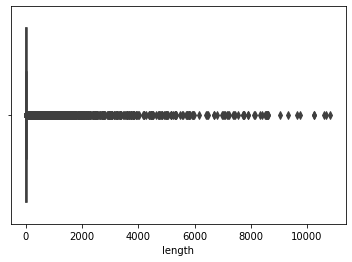

In [ ]:
ax = sns.boxplot(x="length", data=df_volumes_no_agg)

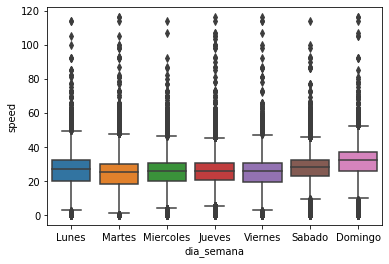

In [ ]:
ax = sns.boxplot(x="dia_semana", y="speed", data=df_volumes_no_agg)

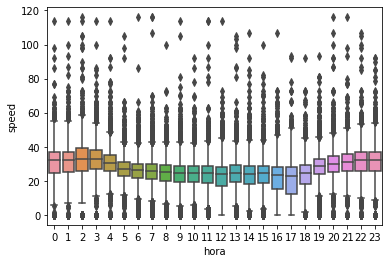

In [ ]:
ax = sns.boxplot(x="hora", y="speed", data=df_volumes_no_agg)

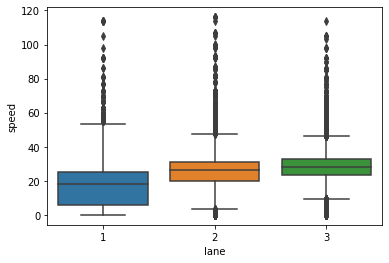

In [ ]:
ax = sns.boxplot(x="lane", y="speed", data=df_volumes_no_agg)

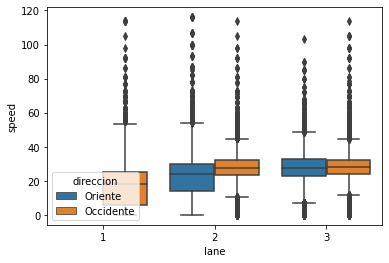

In [ ]:
ax = sns.boxplot(x="lane", y="speed", hue="direccion", data=df_volumes_no_agg)

Series de tiempo: Velocidad y Volumenes

In [ ]:
def line_plot_by_tipology(df_volumes, tipology):
  figure, ax = plt.subplots(1, 1, figsize=(22,10))

  all_registered_dates_monitoring = df_volumes["FECHA"].astype(str).unique()
  # for each date
  all_plots = []
  for d in all_registered_dates_monitoring:
    df_filt = df_volumes[df_volumes["FECHA"].astype(str) == d]
    all_plots.append(ax.plot(df_filt["PERIODO"], df_filt[tipology])[0])

  ax.set_title(tipology, fontsize=16)
  ax.set_xlabel("PERIODO", fontsize=14)
  ax.set_ylabel("Conteo", fontsize=14)
  ax.legend(tuple(all_plots), tuple(all_registered_dates_monitoring))
  ax.grid(True)

In [ ]:
df_volumes_no_agg["fecha_no_ts"] = pd.to_datetime(df_volumes_no_agg["fecha"]).apply(lambda x: x.date())
df_volumes_no_agg["hora_del_dia"] = df_volumes_no_agg["fecha"].apply(lambda x: x[11:16])

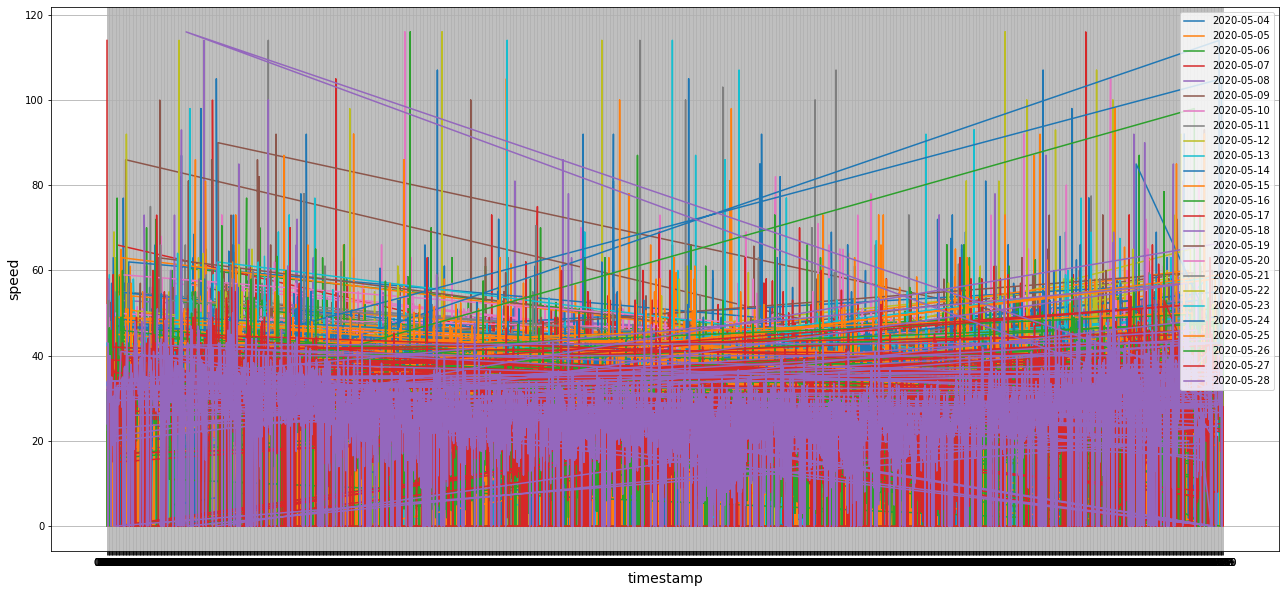

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))

all_registered_dates_monitoring = df_volumes_no_agg["fecha_no_ts"].astype(str).unique()
# for each date
all_plots = []
for d in all_registered_dates_monitoring:
  df_filt = df_volumes_no_agg[df_volumes_no_agg["fecha_no_ts"].astype(str) == d]
  all_plots.append(ax.plot(df_filt["hora_del_dia"], df_filt["speed"])[0])

# ax.set_title(tipology, fontsize=16)
ax.set_xlabel("timestamp", fontsize=14)
ax.set_ylabel("speed", fontsize=14)
ax.legend(tuple(all_plots), tuple(all_registered_dates_monitoring))
ax.grid(True)


In [ ]:
df_filt = df_volumes_no_agg[df_volumes_no_agg["fecha_no_ts"].astype(str) == all_registered_dates_monitoring[0]]

In [ ]:
df_volumes_no_agg["hora_del_dia"] = df_volumes_no_agg["fecha"].apply(lambda x: x[11:16])
df_volumes_no_agg["hora_del_dia"].unique()

array(['00:00', '00:02', '00:03', ..., '02:45', '02:49', '02:50'],
      dtype=object)

0         00:00:01.898508
1         00:02:01.982643
2         00:03:02.019669
3         00:03:02.019669
4         00:04:02.029455
               ...       
124708    23:57:02.728693
124709    23:58:02.769848
124710    23:58:02.769848
124711    23:59:02.784319
124712    23:59:02.784319
Name: fecha, Length: 124713, dtype: object

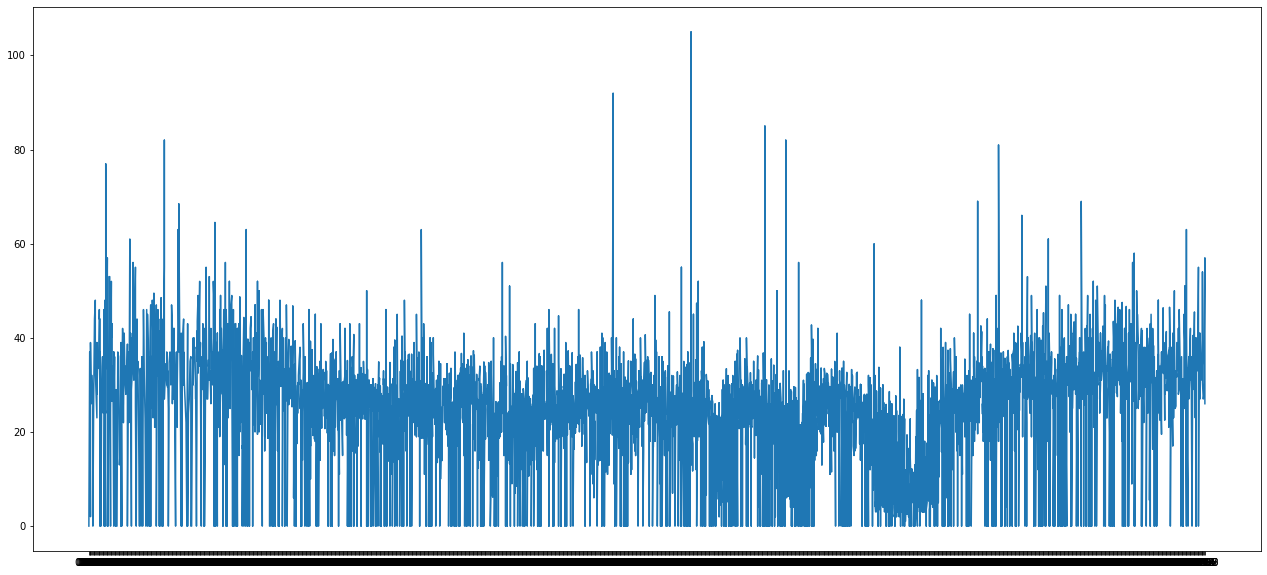

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(22,10))
ax.plot(df_filt["hora_del_dia"], df_filt["speed"])

Time series with Plotly

In [ ]:
df_volumes_no_agg["fecha_dt"] = pd.to_datetime(df_volumes_no_agg["fecha"])

In [ ]:
df_filt = df_volumes_no_agg[df_volumes_no_agg["fecha_no_ts"].astype(str) == all_registered_dates_monitoring[0]]

In [ ]:
all_registered_dates_monitoring

array(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
       '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
       '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
       '2020-05-28'], dtype=object)

In [ ]:
df_filt.head()

,objectid,time,fecha,ano,mes,dia_semana,hora,site_id,direction,direccion,lane,speed,flow,occupancy,length,intensity,congested,inverted,name,orientacion,the_geom,fecha_no_ts,timestamp,hora_del_dia,fecha_dt
0,1,2020-05-04 05:00:01.898508,2020-05-04 00:00:01.898508,2020,May,Lunes,0,25004,3,Oriente,2,0.0,60,0,0.0,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...,2020-05-04,1.588550e+09,00:00,2020-05-04 00:00:01.898508
1,2,2020-05-04 05:02:01.982643,2020-05-04 00:02:01.982643,2020,May,Lunes,0,25004,3,Oriente,3,37.0,60,0,15.8,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...,2020-05-04,1.588551e+09,00:02,2020-05-04 00:02:01.982643
2,3,2020-05-04 05:03:02.019669,2020-05-04 00:03:02.019669,2020,May,Lunes,0,25004,4,Occidente,2,2.0,60,0,10.9,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...,2020-05-04,1.588551e+09,00:03,2020-05-04 00:03:02.019669
3,4,2020-05-04 05:03:02.019669,2020-05-04 00:03:02.019669,2020,May,Lunes,0,25004,4,Occidente,3,39.0,120,0,18.5,2,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...,2020-05-04,1.588551e+09,00:03,2020-05-04 00:03:02.019669
4,5,2020-05-04 05:04:02.029455,2020-05-04 00:04:02.029455,2020,May,Lunes,0,25004,3,Oriente,3,26.0,60,0,24.4,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...,2020-05-04,1.588551e+09,00:04,2020-05-04 00:04:02.029455


In [ ]:
df_filt["fecha"].unique()[0:10]

array(['2020-05-04 00:00:01.898508', '2020-05-04 00:02:01.982643',
       '2020-05-04 00:03:02.019669', '2020-05-04 00:04:02.029455',
       '2020-05-04 00:05:02.108822', '2020-05-04 00:06:02.112954',
       '2020-05-04 00:07:02.140664', '2020-05-04 00:09:02.161804',
       '2020-05-04 00:10:02.239688', '2020-05-04 00:11:02.293091'],
      dtype=object)

In [ ]:
fig = px.line(df_filt, x='timestamp', y="speed")
fig.show()

In [ ]:
pd.to_datetime(df_volumes_no_agg["fecha"]).apply(lambda x: datetime.datetime.timestamp(x))

0         1.588550e+09
1         1.588551e+09
2         1.588551e+09
3         1.588551e+09
4         1.588551e+09
              ...     
124708    1.590710e+09
124709    1.590710e+09
124710    1.590710e+09
124711    1.590710e+09
124712    1.590710e+09
Name: fecha, Length: 124713, dtype: float64

In [ ]:
df_volumes_no_agg

NameError: ignored

In [ ]:
df_volumes_no_agg.to_parquet("volumes_camera.parquet")

In [ ]:
df_volumes_no_agg

,objectid,time,fecha,ano,mes,dia_semana,hora,site_id,direction,direccion,lane,speed,flow,occupancy,length,intensity,congested,inverted,name,orientacion,the_geom
0,1,2020-05-04 05:00:01.898508,2020-05-04 00:00:01.898508,2020,May,Lunes,0,25004,3,Oriente,2,0.0,60,0,0.00,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
1,2,2020-05-04 05:02:01.982643,2020-05-04 00:02:01.982643,2020,May,Lunes,0,25004,3,Oriente,3,37.0,60,0,15.80,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
2,3,2020-05-04 05:03:02.019669,2020-05-04 00:03:02.019669,2020,May,Lunes,0,25004,4,Occidente,2,2.0,60,0,10.90,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
3,4,2020-05-04 05:03:02.019669,2020-05-04 00:03:02.019669,2020,May,Lunes,0,25004,4,Occidente,3,39.0,120,0,18.50,2,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
4,5,2020-05-04 05:04:02.029455,2020-05-04 00:04:02.029455,2020,May,Lunes,0,25004,3,Oriente,3,26.0,60,0,24.40,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124708,124709,2020-05-29 04:57:02.728693,2020-05-28 23:57:02.728693,2020,May,Jueves,23,25004,4,Occidente,2,30.0,60,0,35.00,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
124709,124710,2020-05-29 04:58:02.769848,2020-05-28 23:58:02.769848,2020,May,Jueves,23,25004,3,Oriente,3,34.0,60,0,17.50,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
124710,124711,2020-05-29 04:58:02.769848,2020-05-28 23:58:02.769848,2020,May,Jueves,23,25004,4,Occidente,2,37.0,60,0,9.20,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...
124711,124712,2020-05-29 04:59:02.784319,2020-05-28 23:59:02.784319,2020,May,Jueves,23,25004,3,Oriente,3,46.0,60,0,19.40,1,f,f,Calle 17 x Río Bogotá,4 Direcciones,0101000020E61000006CD097DEFE8A52C00D37E0F3C3C8...


In [ ]:
df_volumes_no_agg["fecha_no_ts"] = pd.to_datetime(df_volumes_no_agg["fecha"]).apply(lambda x: x.date())
df_volumes_no_agg["timestamp"] = pd.to_datetime(df_volumes_no_agg["fecha"]).apply(lambda x: datetime.datetime.timestamp(x))

In [ ]:
df_volumes_no_agg[["fecha", "speed", "fecha_no_ts", "timestamp"]].to_csv("cont_mobility_light.csv")